<a href="https://colab.research.google.com/github/MANIDEEP2127/2303A52127_EXAI/blob/main/Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression equation: y = 10.00 + 5.00*TV_Ads
Predicted cars sold for 10 TV ads: 60.00

Results Table:
    TV_Ads  Cars_Sold  Prediction  SHAP_Value  Over/Under
0       1         14        15.0        -5.0         1.0
1       3         24        25.0         5.0         1.0
2       2         18        20.0         0.0         2.0
3       1         17        15.0        -5.0        -2.0
4       3         27        25.0         5.0        -2.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


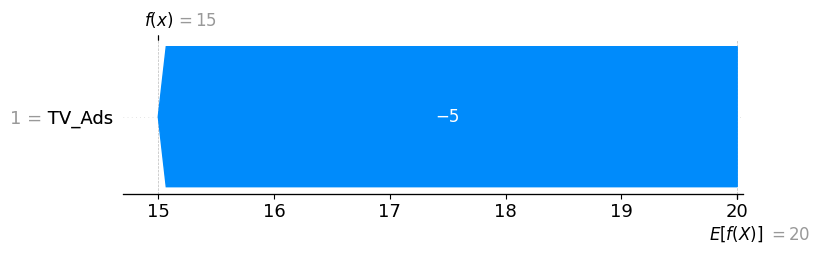

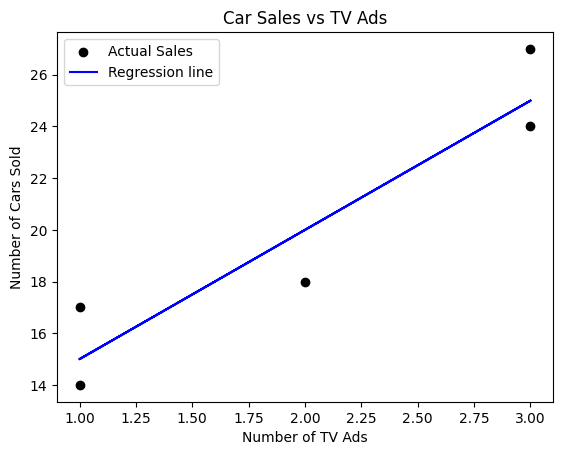

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_excel("/content/Car_Sales.xlsx", sheet_name="Sheet1")

X = df[['TV_Ads']]
y = df['Cars_Sold']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]
print(f"Regression equation: y = {intercept:.2f} + {slope:.2f}*TV_Ads")

ads_to_predict = np.array([[10]])
y_pred = model.predict(ads_to_predict)[0]
print(f"Predicted cars sold for 10 TV ads: {y_pred:.2f}")
baseline = y.mean()
predictions = model.predict(X)
shap_values_custom = predictions - baseline

results = df.copy()
results['Prediction'] = predictions
results['SHAP_Value'] = shap_values_custom
results['Over/Under'] = results['Prediction'] - results['Cars_Sold']
print("\nResults Table:\n", results)
explainer = shap.Explainer(model, X)
shap_vals = explainer(X)

shap.plots.waterfall(shap_vals[0])

shap.plots.force(shap_vals)
plt.scatter(X, y, color='black', label='Actual Sales')
plt.plot(X, predictions, color='blue', label='Regression line')
plt.xlabel('Number of TV Ads')
plt.ylabel('Number of Cars Sold')
plt.title('Car Sales vs TV Ads')
plt.legend()
plt.show()